In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [4]:
dataset = pd.read_csv('Input Files/auto-mpg.csv')

In [5]:
dataset.head()

MPG  Cylinders  Displacement Horsepower  Weight  Acceleration  Model_year  \
0   8.0          8         307.0        130    3504          12.0        2015   
1  15.0          8         350.0        165    3693          11.5        2015   
2  18.0          8         318.0        150    3436          11.0        2015   
3  16.0          8         304.0        150    3433          12.0        2015   
4  17.0          8         302.0        140    3449          10.5        2015   

   Origin                   Car_Name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [6]:
dataset.describe()

MPG   Cylinders  Displacement       Weight  Acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.489447    5.454774    193.425879  2970.424623     15.568090   
std      7.849757    1.701004    104.269838   846.841774      2.757689   
min      8.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.125000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

        Model_year      Origin  
count   398.000000  398.000000  
mean   2008.989950    1.572864  
std       3.697627    0.802055  
min    2003.000000    1.000000  
25%    2006.000000    1.000000  
50%    2009.000000    1.000000  
75%    2012.000000    2.000000  
max    2015.000000    3.000000

In [7]:
model = pd.DataFrame(dataset, columns = ['MPG', 'Acceleration'])

In [8]:
model

MPG  Acceleration
0     8.0          12.0
1    15.0          11.5
2    18.0          11.0
3    16.0          12.0
4    17.0          10.5
..    ...           ...
393  27.0          15.6
394  44.0          24.6
395  32.0          11.6
396  28.0          18.6
397  31.0          19.4

[398 rows x 2 columns]

In [9]:
#convert to arrays
points = model
points[:10]

MPG  Acceleration
0   8.0          12.0
1  15.0          11.5
2  18.0          11.0
3  16.0          12.0
4  17.0          10.5
5  15.0          10.0
6  14.0           9.0
7  14.0           8.5
8  14.0          10.0
9  15.0           8.5

In [10]:
points=points.reset_index().values

In [11]:
# Initialize the hyper parameters
learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000

In [12]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [13]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [14]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, points, learning_rate)
    return [b, m]

In [15]:
#Call function
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b,initial_m,compute_error_for_line_given_points(initial_b, initial_m, points)))

Starting gradient descent at b = 0, m = 0, error = 613.2179899497488


In [16]:
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

In [17]:
 print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

After 1000 iterations b = 0.1211874783663623, m = 1.4920263083109613, error = 51.13854646383735


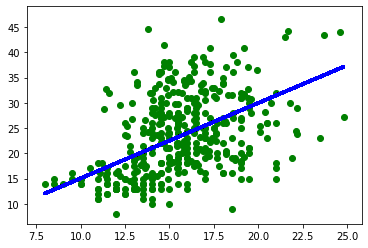

In [20]:
# Plot outputs
for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        plt.scatter(x,y,color='green')
        plt.plot(model.Acceleration, (1.4920263083109613 * model.Acceleration + 0.1211874783663623), color='blue',linewidth=3)